# Exploring the relationship between causes of death and total deaths in South Africa


South Africa is one of the leading contributors to Tuberculosis cases in the world. Two-thirds of all Tuberculosis cases in the world came from 8 countries, [South Africa](https://www.who.int/news-room/fact-sheets/detail/tuberculosis#:~:text=In%202018%2C%20the%2030%20high,Nigeria%2C%20Bangladesh%20and%20South%20Africa.) being one of them. This notebook looks at the impact of the top eleven causes of death on the total deaths of South Africans. In 2015, the top three leading causes of death in South Africa were [tuberculosis, diabetes and cerebrovascular diseases (stroke)](https://www.gov.za/faq/health/what-are-leading-causes-death-south-africa#:~:text=What%20are%20the%20leading%20causes%20of%20death%20in%20South%20Africa,commonly%20present%20as%20a%20stroke). Investigating which cause of death have a major relationship to South Africa's total number of deaths can be greatly beneficial. If we know which causes impact total deaths the most, we can then focus on trying to minimise these causes of death in South Africa per year. Proving the relationships between total deaths and the different causes of death are limited to years where the data was collected (1997 to the end of 2015) and that very specific causes of death are grouped into one category. For example diseases such as tuberculosis, HIV and malaria are grouped into a category called "certain infectious and parasitic diseases" so the relationship found is not between tuberculosis and total deaths but rather between the category, "certain infectious and parasitic diseases" and total deaths.

**Research Questions:** Which causes of death have a major relationship to South Africa's total numbers of deaths? Which cause of death has the highest percentage contribution to total deaths? Which causes of death have no relationship to total deaths? Which causes of death should be targeted to achieve a lower total number of deaths per year?

**Hypothesis:**
In addition to the three main causes of death in South Africa, there could also be a strong relationship between other main causes of death. These relationships could be stronger than those of the top three causes of death, and therefore will also be tested to see which causes of death has the strongest and more meaningful relationship to total deaths. External causes of death (which contains deaths such as car crashes and homicides) is also investigated but due to the unpredictable nature of this cause of death (these deaths can fluctuate dramatically month by month), it is not expected to have a strong correlation to total deaths.

To test this hypothesis, data is obtained from [Nesstar](http://nesstar.statssa.gov.za:8282/webview/) Mortality and Causes of Death 1997-2015 in the Vital Statistics section. Variables of interest have been extracted from this data (Main groups of the underlying causes of death per month per year) and will be used to fit regression models to establish which variables in the dataset are significantly related to the total deaths in South Africa. 


### Methodology
A brief overview of the methodology is as follows:<br/>
1. Read in data <br/>
2. Tidy and Clean the data <br/>
3. Exploring Data <br/>
4. Initial modelling and Hypothesis testing<br/>
5. Conclusion <br/>

<br/>
After the data has been cleaned and exploratory analysis has been completed, the data is split into training and testing data. The split of training/testing data is 70/30. The training data is used to create a regression model. The model is selected using stepwise regression to select the main causes of death. This is the model selection step. Once this has been done, the test data is used to test the model and obtain the results that need to be interpreted.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from itertools import cycle, islice
from IPython.display import HTML
from scipy import stats
import seaborn as sns 
from matplotlib.pyplot import figure


sns.set_style("darkgrid")

# 1. Loading Data

Load the dataset containing total deaths and causes of death per month and load it into a DataFrame to determine the relationship between each of these causes of death and total deaths. The data is obtained from [Nesstar](http://nesstar.statssa.gov.za:8282/webview/) Mortality and Causes of Death 1997-2015 in the Vital Statistics section.

The Dataset contains the following variables that will be used in the notebook. This includes the top causes of death which store the total deaths per month of that variable from 1997 until the end of 2015. The response variable is total deaths in South Africa per month and there are 11 explanatory variables.
<br/>

##### Year of death:
The year of the recorded deaths. There are 19 possible values. They are as follows:

1 - 1997<br/>
2 - 1998<br/>
3 - 1999<br/>
4 - 2000<br/>
5 - 2001<br/>
6 - 2002<br/>
7 - 2003<br/>
8 - 2004<br/>
9 - 2005<br/>
10 - 2006<br/>
11 - 2007<br/>
12 - 2008<br/>
13 - 2009<br/>
14 - 2010<br/>
15 - 2011<br/>
16 - 2012<br/>
17 - 2013<br/>
18 - 2014<br/>
19 - 2015<br/>

##### Month of death:
The month of the recorded deaths. There are 12 possible values. They are as follows:

1 - January<br/>
2 - February<br/>
3 - March<br/>
4 - April<br/>
5 - May<br/>
6 - June<br/>
7 - July<br/>
8 - August<br/>
9 - September<br/> 
10 - October<br/>
11 - November<br/>
12 - December<br/>


##### Certain infectious and parasitic diseases (A00-B99):
This includes diseases such as tuberculosis, HIV, malaria, cholera, chickenpox, measles, meningitis and scabies.

##### Neoplasms (C00-D48):
This includes diseases such as malignant neoplasms of the breast, malignant melanoma and thyroid cancer.

##### Diseases of the blood and immune mechanism (D50-D89):
This includes diseases such as vitamin B12 deficiency anaemia, nutritional anaemias, red cell aplasia and other haemorrhagic conditions.

##### Diseases of the nervous system (G00-G99):
This includes diseases such as bacterial meningitis, Parkinson's, Alzheimer's, multiple sclerosis, cerebral palsy and epilepsy.

##### Endocrine; nutritional and metabolic diseases (E00-E90):
This includes diseases such as diabetes, diseases of the thyroid and other glandular disorders as well as high cholesterol.

##### Diseases of the circulatory system (I00-I99):
This includes diseases such as coronary artery diseases, hypertension, cardiac failure, valvular disease and strokes.

##### Diseases of the respiratory system(J00-J99):
This includes diseases such as asthma, COPD and pneumonia.

##### Diseases of the digestive system (K00-K93):
This includes diseases such as embedded and impacted teeth, diseases of salivary glands, gastric ulcers, diseases of intestine and liver disease.

##### Diseases of the genitourinary system (N00-N99):
This includes diseases such as nephritic syndrome, renal failure, calculus of kidney and ureter, diseases of prostate and disease of the uterus.

##### Certain conditions originating in the perinatal period (P00-P96):
This includes deaths such as maternal death, neonatal cardiac failure, severe pre-eclampsia and neural tube defects.

##### External causes of morbidity and mortality (V01-Y98):
This includes deaths from substance abuse, car crash, drowning and exposure.

##### Total:
Total deaths for each month

### A short description of the dataset is as follows:

**Total Deaths Dataset:** Contains the total number of deaths in South Africa for the months in a year. It also contains the causes of death and their contribution to total deaths. (Collected: updated after each month in a year starting in 2003 (1997-2003 was added in 2003), Method: Registered deaths at the Department of Home Affairs, Downloaded: 4 June 2020)

In [2]:
totalDeaths = pd.read_csv("deaths.csv",sep=';')#Load the data showing total deaths with causes of death in South Africa in a each month of a year

display("Total Deaths and Causes of Death In South Africa",totalDeaths.head(10))#display total deaths data
totalDeathsrows=len(totalDeaths.axes[0])#find row and column size
totalDeathscols=len(totalDeaths.axes[1])
print("Number of Columns: "+str(totalDeathscols))
print("Number of Rows: "+str(totalDeathsrows))

'Total Deaths and Causes of Death In South Africa'

,Year of death,Month of death,Certain infectious and parasitic diseases (A00-B99),Neoplasms (C00-D48),Diseases of the blood and immune mechanism (D50-D89),Endocrine; nutritional and metabolic diseases (E00-E90),Mental and behavioural disorders (F00-F99),Diseases of the nervous system (G00-G99),Diseases of the eye and adnexa (H00-H59),Diseases of the ear and mastoid process (H60-H95),...,Diseases of the digestive system (K00-K93),Diseases of the skin and subcutaneous tissue (L00-L99),Diseases of the musculoskeletal system etc. (M00-M99),Diseases of the genitourinary system (N00-N99),Pregnancy; childbirth and puerperium (O00-O99),Certain conditions originating in the perinatal period (P00-P96),Congenital malformations (Q00-Q99),Symptoms and signs not elsewhere classified (R00-R99),External causes of morbidity and mortality (V01-Y98),Total
0,1997.0,January,3133,2247,305,1140,107,429,1,4,...,714,54,63,342,43,1822,129,2808,3935,23242
1,1997.0,February,2930,2223,352,1095,106,429,2,5,...,669,63,74,323,36,2396,136,2655,4161,23334
2,1997.0,March,3124,2210,339,1101,98,441,0,4,...,773,50,69,318,52,2451,150,3054,4624,24606
3,1997.0,April,3205,2261,366,1256,122,428,1,10,...,727,73,79,372,72,2695,156,3247,3911,25641
4,1997.0,May,3509,2495,401,1330,122,553,2,8,...,850,63,93,381,56,2996,190,3655,4488,28902
5,1997.0,June,3446,2325,399,1500,152,594,1,1,...,815,71,107,412,48,2417,194,4006,4783,30182
6,1997.0,July,3601,2431,439,1459,158,596,2,3,...,804,81,108,381,60,2105,157,4096,4597,30214
7,1997.0,August,3312,2267,419,1354,146,587,1,4,...,675,78,105,358,59,1998,147,3749,4766,28163
8,1997.0,September,3374,2270,414,1308,129,531,2,6,...,751,85,99,405,57,1894,113,3776,4415,27337
9,1997.0,October,3573,2438,490,1296,112,509,4,4,...,758,75,104,431,54,1974,164,3947,4798,27912


Number of Columns: 22
Number of Rows: 229


In [3]:
print("Start Year 1997:",totalDeaths["Year of death"].min()==1997) #make sure start year =1997
print("End Year 2015:  ",totalDeaths["Year of death"].max()==2015.0) #make sure start year =2015
print("No missing months:  ", len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'January'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'February'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'March'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'April'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'May'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'June'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'July'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'August'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'September'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'October'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'November'])==19 and len(totalDeaths[totalDeaths['Month of death'].astype(str) == 'December'])==19) # no missing months
print("No missing values:  ", totalDeaths.isnull().sum().sum()==0) # no missing values
print("No duplicated rows:  ",totalDeaths.duplicated().sum()==0 ) #no duplicated rows

Start Year 1997: True
End Year 2015:   True
No missing months:   True
No missing values:   False
No duplicated rows:   True


The data is validated by the published paper "Mortality and causes of death in South Africa, 2015:
Findings from death notification" that can be downloaded and viewed [here](http://microdata.worldbank.org/index.php/catalog/3023/download/42110). Page 22 shows a table of the leading causes of death in South Africa in 2015. This matches the data exactly as can be seen below for total deaths for each cause of death in 2015. The paper, ["Cause of death statistics for South Africa: Challenges and possibilities for improvement"](https://www.samrc.ac.za/sites/default/files/files/2017-05-26/cause_death_statsSA.pdf), also validates the data as on page 2, the table shows that certain infectious and parasitic diseases (HIV and TB in the table) contributes the highest number of deaths, followed by diseases of the circulatory system (stroke, IHD and hypertensive diseases), then symptoms and signs not elsewhere classified (ill-defined natural) and then diseases of the respiratory system (pneumonia and chronic obstructive pulmonary disease). This trend matches the data trend of the leading natural causes of death. The questions, however, can only be answered for the years that the data contains i.e. 1997 to the end of 2015. The data should not contain potential biases as it has been validated through different external sources. Missing data can lead to incorrect calculations. These calculations can also be unattainable if required data is missing. Addressing the issue of missing data and the fact that there should be no potential bias leads to a high degree that the research questions can be answered. 

In [4]:
totalDeaths.loc[totalDeaths['Year of death'] == 2015.0].sum() # sum of diseases from 2015

Year of death                                                                                                   24180
Month of death                                                      JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...
Certain infectious and parasitic diseases (A00-B99)                                                             89727
Neoplasms (C00-D48)                                                                                             41799
Diseases of the blood and immune mechanism (D50-D89)                                                            12949
Endocrine; nutritional and metabolic diseases (E00-E90)                                                         31623
Mental and behavioural disorders (F00-F99)                                                                       1901
Diseases of the nervous system (G00-G99)                                                                        10735
Diseases of the eye and adnexa (H00-H59)                

# 2. Tidying and Cleaning the Data
The data needs to be cleaned so that i) unnecessary columns are removed, ii) data has the correct type, iii) no missing values in columns, iv) columns have correct description names, v) the year range of the dataset is from 1997 to the end of 2015, vi) each year has 12 months, vii) the index is the date and is of the correct date format and viii) remove total deaths row for each disease in the dataset so correct values are in the year and month column (total deaths per cause of death can be calculated from dataset if needed).

In [5]:
def removeFloat(text):#fixes the incorrect integer format for the data  
    text=text[:-2]      #removes decimal point 
    return text

##### Cleaning Total Deaths and Cause of Death Dataset

In [6]:
totalDeaths.drop(totalDeaths.index[228], inplace=True) #deletes total count row from dataset

totalDeaths['Year of death']=totalDeaths['Year of death'].astype('str') #convert to string in order to clean the Date
totalDeaths['Year of death']=totalDeaths['Year of death'].apply(removeFloat) #remove decimal from year

d = {'January':1, 'February':2, 'March':3, 'April':4,'May':5, 'June':6, 'July':7, 'August':8,'September':9, 'October':10, 'November':11, 'December':12 }
totalDeaths["Month of death"] = totalDeaths["Month of death"].map(d) #convert name of month to number
totalDeaths['Month of death']=totalDeaths['Month of death'].astype('str') #convert to string in order to clean the Date

totalDeaths['Date'] = totalDeaths['Year of death'] + '-' + totalDeaths['Month of death']
totalDeaths['Date']=pd.to_datetime(totalDeaths['Date'])+ pd.tseries.offsets.MonthEnd(1)  #convert date to datetime type

totalDeaths=totalDeaths[['Date','Total','Certain infectious and parasitic diseases (A00-B99)','Neoplasms (C00-D48)','Diseases of the blood and immune mechanism (D50-D89)','Endocrine; nutritional and metabolic diseases (E00-E90)','Diseases of the nervous system (G00-G99)','Diseases of the circulatory system (I00-I99)','Diseases of the respiratory system (J00-J99)','Diseases of the digestive system (K00-K93)','Diseases of the genitourinary system (N00-N99)','Certain conditions originating in the perinatal period (P00-P96)','External causes of morbidity and mortality (V01-Y98)']] # drop Year of death and Month of death columns as well as small causes of death
totalDeaths=totalDeaths.set_index('Date') #set index to "date" column

totalDeaths.rename(columns={'Certain infectious and parasitic diseases (A00-B99)':'Infectious diseases'},inplace=True) # clarify names
totalDeaths.rename(columns={'Neoplasms (C00-D48)':'Neoplasms'},inplace=True)# clarify names
totalDeaths.rename(columns={'Diseases of the blood and immune mechanism (D50-D89)':'Blood and immune system diseases'},inplace=True)# clarify names
totalDeaths.rename(columns={'Endocrine; nutritional and metabolic diseases (E00-E90)':'Endocrine and metabolic disorders'},inplace=True)
totalDeaths.rename(columns={'Diseases of the nervous system (G00-G99)':'Nervous system diseases'},inplace=True)# clarify names
totalDeaths.rename(columns={'Diseases of the circulatory system (I00-I99)':'Cardiovascular diseases'}, inplace=True) # clarify names
totalDeaths.rename(columns={'Diseases of the respiratory system (J00-J99)':'Lung diseases'}, inplace=True) # clarify names
totalDeaths.rename(columns={'Diseases of the digestive system (K00-K93)':'Digestive system diseases'},inplace=True)# clarify names
totalDeaths.rename(columns={'Diseases of the genitourinary system (N00-N99)':'Reproductive and urinary system diseases'},inplace=True)# clarify names
totalDeaths.rename(columns={'Certain conditions originating in the perinatal period (P00-P96)':'Perinatal deaths'}, inplace=True) # clarify names
totalDeaths.rename(columns={'External causes of morbidity and mortality (V01-Y98)':'External causes of death'}, inplace=True) # clarify names
totalDeaths.rename(columns={'Total':'Total Deaths'}, inplace=True) # clarify names

totalDeaths['Infectious diseases']=totalDeaths['Infectious diseases'].astype(int) #convert to int
totalDeaths['Neoplasms']=totalDeaths['Neoplasms'].astype(int) #convert to int
totalDeaths['Blood and immune system diseases']=totalDeaths['Blood and immune system diseases'].astype(int) #convert to int
totalDeaths['Endocrine and metabolic disorders']=totalDeaths['Endocrine and metabolic disorders'].astype(int) #convert to int
totalDeaths['Nervous system diseases']=totalDeaths['Nervous system diseases'].astype(int) #convert to int
totalDeaths['Cardiovascular diseases']=totalDeaths['Cardiovascular diseases'].astype(int) #convert to int
totalDeaths['Lung diseases']=totalDeaths['Lung diseases'].astype(int) #convert to int
totalDeaths['Digestive system diseases']=totalDeaths['Digestive system diseases'].astype(int) #convert to int
totalDeaths['Reproductive and urinary system diseases']=totalDeaths['Reproductive and urinary system diseases'].astype(int) #convert to int
totalDeaths['Perinatal deaths']=totalDeaths['Perinatal deaths'].astype(int) #convert to int
totalDeaths['External causes of death']=totalDeaths['External causes of death'].astype(int) #convert to int
totalDeaths['Total Deaths']=totalDeaths['Total Deaths'].astype(int) #convert to int

totalDeaths=totalDeaths.sort_values(by='Date') #sort by date

print(totalDeaths.info())
display(totalDeaths.head(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228 entries, 1997-01-31 to 2015-12-31
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Total Deaths                              228 non-null    int32
 1   Infectious diseases                       228 non-null    int32
 2   Neoplasms                                 228 non-null    int32
 3   Blood and immune system diseases          228 non-null    int32
 4   Endocrine and metabolic disorders         228 non-null    int32
 5   Nervous system diseases                   228 non-null    int32
 6   Cardiovascular diseases                   228 non-null    int32
 7   Lung diseases                             228 non-null    int32
 8   Digestive system diseases                 228 non-null    int32
 9   Reproductive and urinary system diseases  228 non-null    int32
 10  Perinatal deaths                          2

,Total Deaths,Infectious diseases,Neoplasms,Blood and immune system diseases,Endocrine and metabolic disorders,Nervous system diseases,Cardiovascular diseases,Lung diseases,Digestive system diseases,Reproductive and urinary system diseases,Perinatal deaths,External causes of death
Date,,,,,,,,,,,,
1997-01-31,23242,3133,2247,305,1140,429,4222,1744,714,342,1822,3935
1997-02-28,23334,2930,2223,352,1095,429,3954,1725,669,323,2396,4161
1997-03-31,24606,3124,2210,339,1101,441,3990,1758,773,318,2451,4624
1997-04-30,25641,3205,2261,366,1256,428,4546,2114,727,372,2695,3911
1997-05-31,28902,3509,2495,401,1330,553,5286,2424,850,381,2996,4488
1997-06-30,30182,3446,2325,399,1500,594,5994,2917,815,412,2417,4783
1997-07-31,30214,3601,2431,439,1459,596,6052,3084,804,381,2105,4597
1997-08-31,28163,3312,2267,419,1354,587,5385,2753,675,358,1998,4766
1997-09-30,27337,3374,2270,414,1308,531,5064,2644,751,405,1894,4415


In [7]:
totalObs=len(totalDeaths.axes[0])#find observations and explanatory vatiables size
totalExplan=len(totalDeaths.axes[1])-1 #-1 as total deaths is response not explanatory variable
cleanRows=len(totalDeaths.axes[0])#find row and column size
cleanCols=len(totalDeaths.axes[1])

print("Number of Explanatory Variables: "+str(totalExplan))
print("Number of Observations: "+str(totalObs))
print("Raw data contained",str(totalDeathscols),"columns and",str(totalDeathsrows),"rows where as now the cleaned data contains",str(cleanCols),"columns and",str(cleanRows),"rows")

Number of Explanatory Variables: 11
Number of Observations: 228
Raw data contained 22 columns and 229 rows where as now the cleaned data contains 12 columns and 228 rows


In [8]:
print("Start Year 1997:",totalDeaths.index[0]==pd.Timestamp("1997-01-31 00:00:00")) #make sure start year =1997
print("End Year 2015:  ",totalDeaths.index[-1]==pd.Timestamp("2015-12-31 00:00:00")) #make sure start year =2015
print("No missing months:  ", len(totalDeaths)==(19*12)) # no missing months
print("No missing values:  ", totalDeaths.isnull().sum().sum()==0) # no missing values
print("No duplicated rows:  ",totalDeaths.duplicated().sum()==0 ) #no duplicated rows

Start Year 1997: True
End Year 2015:   True
No missing months:   True
No missing values:   True
No duplicated rows:   True


The removed columns were removed because over 19 years, they only contributed to less than forty thousand deaths compared to the variables that were kept which had well over one hundred thousand deaths contributed. The only exception being the column "Symptoms and signs not elsewhere classified" which contributed about a million deaths, however, the category is too broad to include as it contains many general causes of death that could be classified into any of the other causes of death categories and contains no specific causes of death. It also contains deaths from unknown causes which does not contribute to the answering of the research questions. This cleaned data contains no missing values and provides only relevant causes of death which is necessary to answer the research questions. 

# 3. Exploring data

To better understand the data, the correlation coefficients, the percentage of total deaths per month per year for the causes of death, and the rates of change for the data are calculated. This gives us a better view of the relationships between the causes of death and the total deaths. The percentage calculation helps to show the impact of each cause of death, and the rate of change shows how the causes of death change month to month. Total deaths and each cause of death are separately graphed to get a visual representation of the data. The three causes of death that gave the strongest correlation coefficient to total deaths are also graphed versus total deaths to give a visual representation of the relationship.

<a id='sep'></a>
### All Causes of Death and Total Deaths Plotted

				Plots for Total Death and Each Individual Cause of Death


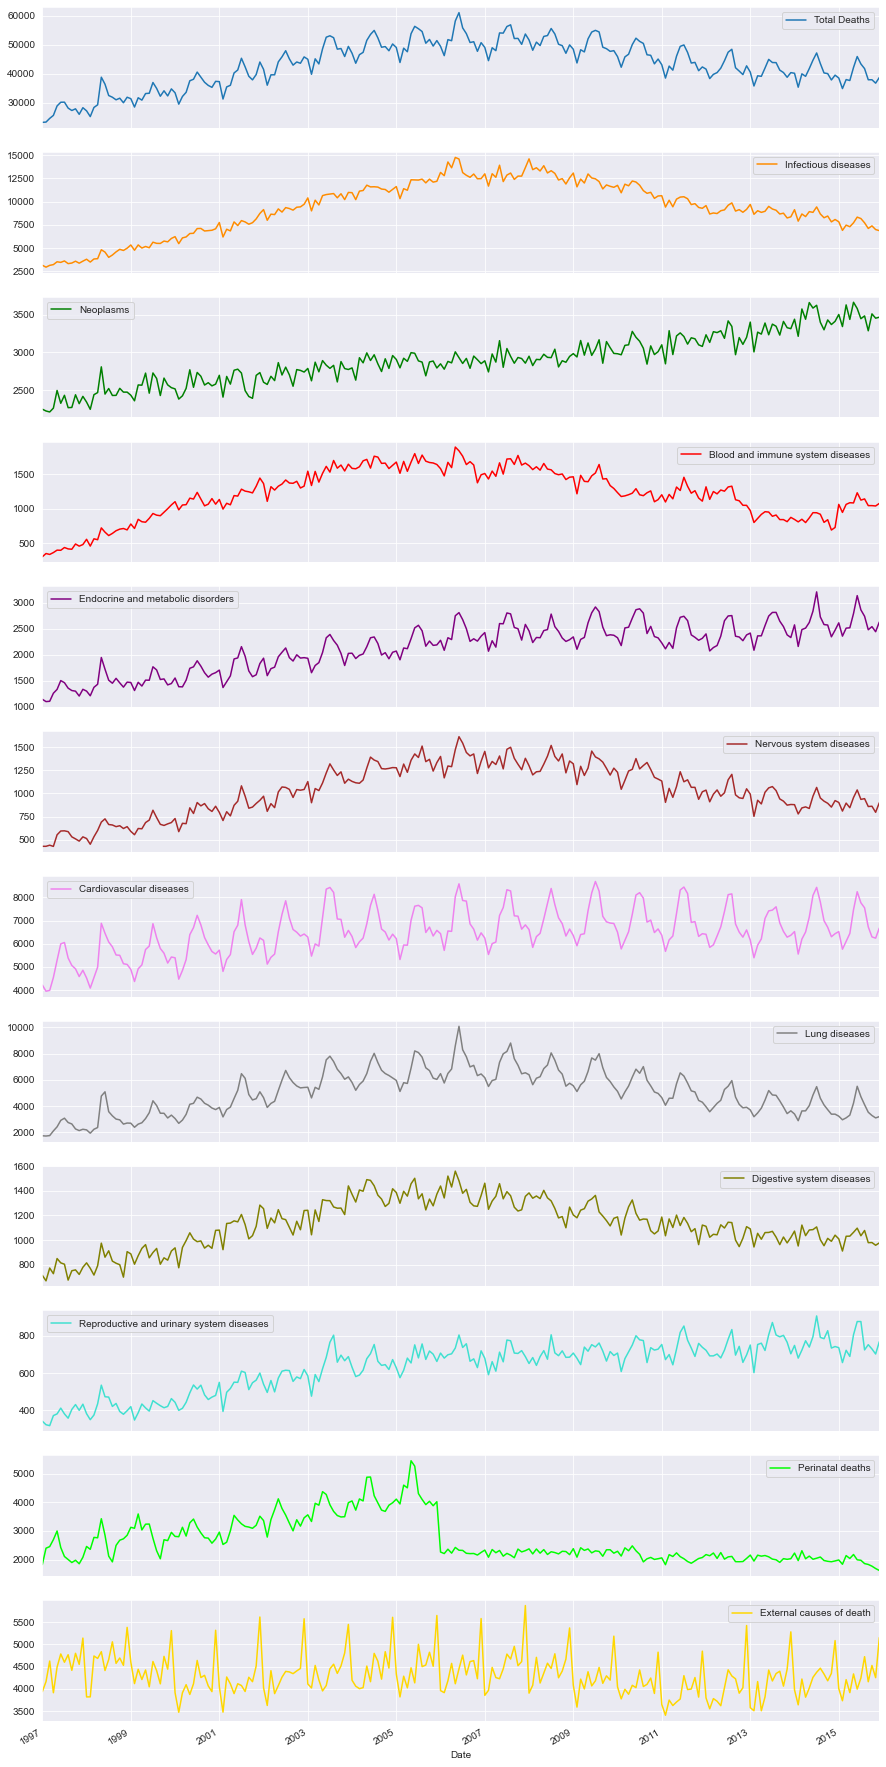

In [9]:
print('\t\t\t\tPlots for Total Death and Each Individual Cause of Death') #set title
colours = list(islice(cycle(['#1f77b4', 'darkorange', 'g', 'r', 'purple','brown','violet','gray','olive','turquoise','lime','gold']), None, len(totalDeaths))) #colour of lines
totalDeaths.plot(subplots=True,figsize=(15,35),color=colours) #graphs all columns in dataset as a subplot
plt.show()

The above graphs give a visual representation of the different causes of death as well as total deaths from 1997 to the end of 2015. It shows how the number of deaths changes per month for the respected causes of death. It can be seen that the cause of death with the biggest fluctuations between months is external causes of death.

<a id='another_cell'></a>
### All variables plotted together with total deaths

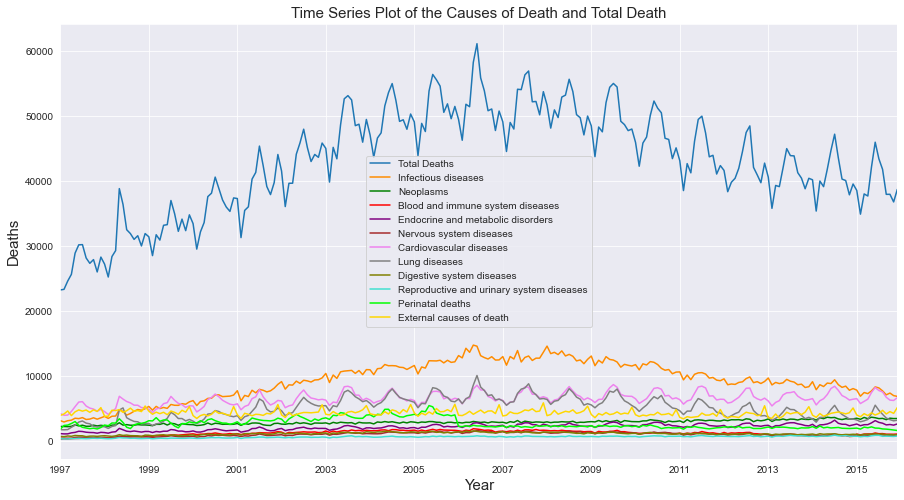

In [10]:
sAxis=plt.gca() #makes sure all plots are plotted on same axis when their axis is set to this
totalDeaths.plot(kind='line', figsize=[15,8],ax=sAxis,legend=True,color=colours) #plots Total Deaths data
plt.title('Time Series Plot of the Causes of Death and Total Death',fontsize=15) #set title
plt.xlabel('Year', fontsize=15) #set x axis title
plt.ylabel('Deaths', fontsize=15) #set y axis title
plt.show()

The graph above shows all causes of death and total deaths plotted together on one plot. This shows how certain causes of death, such as reproductive and urinary system diseases (turquoise) and digestive system diseases (olive), death numbers stay fairly consistent from 1997 to the end of 2015. Other causes of death, such as infectious diseases (dark orange) and lung diseases (grey), are less consistent over the years. The cause of death and total deaths line colours are consistent with the colours of the [previous plot](#sep).

<a id='perc'></a>
### Percentage Contributed by Each Cause of Death per Month per Year to Total Deaths

Percentage of the causes of death contribution to total death per month



,Infectious diseases,Neoplasms,Blood and immune system diseases,Endocrine and metabolic disorders,Nervous system diseases,Cardiovascular diseases,Lung diseases,Digestive system diseases,Reproductive and urinary system diseases,Perinatal deaths,External causes of death
Date,,,,,,,,,,,
1997-01-31,13.48,9.67,1.31,4.90,1.85,18.17,7.50,3.07,1.47,7.84,16.93
1997-02-28,12.56,9.53,1.51,4.69,1.84,16.95,7.39,2.87,1.38,10.27,17.83
1997-03-31,12.70,8.98,1.38,4.47,1.79,16.22,7.14,3.14,1.29,9.96,18.79
1997-04-30,12.50,8.82,1.43,4.90,1.67,17.73,8.24,2.84,1.45,10.51,15.25
1997-05-31,12.14,8.63,1.39,4.60,1.91,18.29,8.39,2.94,1.32,10.37,15.53
...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31,18.45,8.33,2.73,6.56,2.26,18.06,9.83,2.58,1.73,4.44,11.30
2015-09-30,18.72,8.66,2.75,6.54,2.26,17.73,9.32,2.58,1.98,4.81,10.96
2015-10-31,19.44,9.25,2.75,6.69,2.27,16.58,8.66,2.58,1.92,4.66,11.92


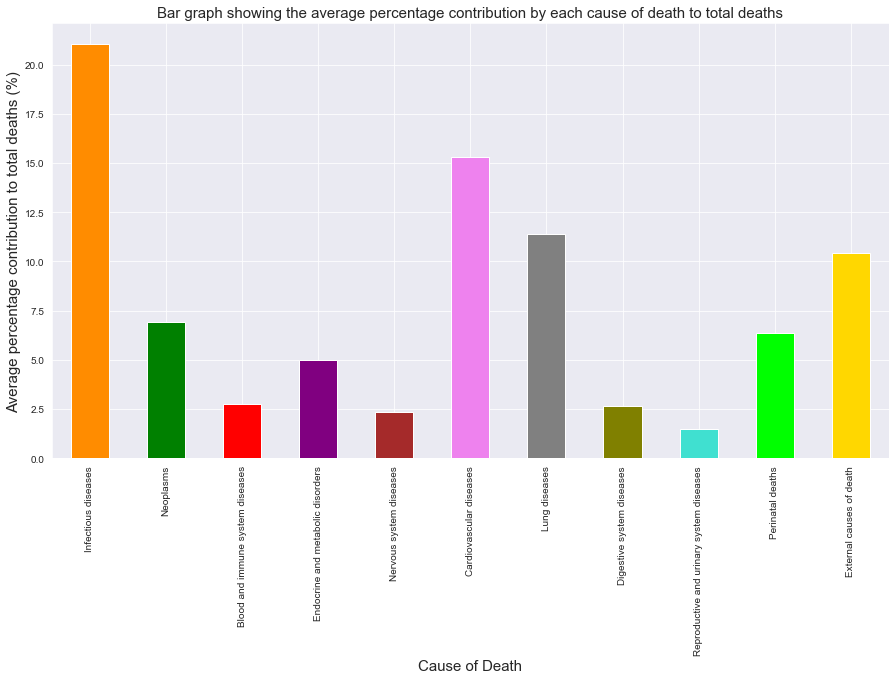

In [11]:
#show the percentages contributed per death to total death
totalPercent = totalDeaths.copy()
totalPercent.drop("Total Deaths",axis=1,inplace=True) #removes total death from dataframe
totalPercent=np.round(totalPercent.div(totalDeaths["Total Deaths"], axis=0)*100,2) #finds percentage
print("Percentage of the causes of death contribution to total death per month\n")
display(totalPercent) #display dataframe

colours2 = list(islice(cycle(['darkorange', 'g', 'r', 'purple','brown','violet','gray','olive','turquoise','lime','gold']), None, len(totalDeaths))) #colour of lines
totalPercent.mean().plot(kind='bar',color=colours2, figsize=[15,8]) #show bar chart of average percent contribution
plt.title('Bar graph showing the average percentage contribution by each cause of death to total deaths', fontsize=15) #set bar graph title
plt.xlabel('Cause of Death', fontsize=15) #set x axis title
plt.ylabel('Average percentage contribution to total deaths (%)', fontsize=15) #set y axis title

plt.show() #display bar graph

The dataframe above shows the percentage of the causes of death contribution to total death per month. This is useful to see which causes of death contribute a large percentage to total deaths. The sum of the percentages per month does not equal 100% as other small or unknown causes of death were omitted from the dataframe. The present causes of death do, however, account for most of the total deaths as can be seen in 2015-12-31 where the percentage contribution of the causes of death amounts to 86.08%. The bar graph gives a visual representation of the average percentage contribution by each cause of death to total deaths from 1997 until the end of 2015. It can be seen that "infectious diseases" contribute the most to total deaths on average between 1997 and the end of 2015. The colours of the bars match the colours of the lines for each cause of death.

### Percentage Change in Deaths

In [12]:
print('\t\t\tPercentage change in deaths between months for each cause of death')
rateOfChange=totalDeaths.pct_change() #find rate of change per month for each cause of death
rateOfChange=rateOfChange.fillna(0) #fill all nan with 0 as can't find percentage change at first month
rateOfChange=np.round(rateOfChange,5) #round to 5 decimal points
display(rateOfChange)

f=rateOfChange.abs().sum() #finding the biggest change in deaths per month
print('The absolute sum of the percentage change per month:')
display(f)

			Percentage change in deaths between months for each cause of death


,Total Deaths,Infectious diseases,Neoplasms,Blood and immune system diseases,Endocrine and metabolic disorders,Nervous system diseases,Cardiovascular diseases,Lung diseases,Digestive system diseases,Reproductive and urinary system diseases,Perinatal deaths,External causes of death
Date,,,,,,,,,,,,
1997-01-31,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1997-02-28,0.00396,-0.06479,-0.01068,0.15410,-0.03947,0.00000,-0.06348,-0.01089,-0.06303,-0.05556,0.31504,0.05743
1997-03-31,0.05451,0.06621,-0.00585,-0.03693,0.00548,0.02797,0.00910,0.01913,0.15546,-0.01548,0.02295,0.11127
1997-04-30,0.04206,0.02593,0.02308,0.07965,0.14078,-0.02948,0.13935,0.20250,-0.05951,0.16981,0.09955,-0.15420
1997-05-31,0.12718,0.09485,0.10349,0.09563,0.05892,0.29206,0.16278,0.14664,0.16919,0.02419,0.11169,0.14753
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31,-0.03723,-0.05654,0.01074,0.01511,-0.04296,0.00856,-0.02795,-0.12942,0.04155,-0.17352,-0.05879,0.11342
2015-09-30,-0.09200,-0.07848,-0.05656,-0.08494,-0.09489,-0.09014,-0.10865,-0.13966,-0.09184,0.03867,-0.01616,-0.11944
2015-10-31,0.00021,0.03885,0.06817,0.00000,0.02419,0.00350,-0.06437,-0.07014,0.00102,-0.03059,-0.03284,0.08802


The absolute sum of the percentage change per month:


Total Deaths                                12.76708
Infectious diseases                         11.30707
Neoplasms                                    9.67369
Blood and immune system diseases            14.99147
Endocrine and metabolic disorders           15.03739
Nervous system diseases                     16.73079
Cardiovascular diseases                     16.66587
Lung diseases                               22.07821
Digestive system diseases                   14.35606
Reproductive and urinary system diseases    16.88347
Perinatal deaths                            16.33857
External causes of death                    22.41408
dtype: float64

This dataframe shows the percentage change in deaths between months for each cause of death. For example, in total deaths, 1997-01-31 had 23242 deaths and 1997-02-28 had 23334 deaths. This results in: $\frac{(23334-23242)}{(23242)} = 0.00396$. This means that there was a 0.00396 percent increase in total deaths between 1997-01-31 and 1997-02-28 i.e. $23242+(23242\times 0.00396) =23334$. Using this dataframe we calculated the absolute sum of the percentage change per month for each cause of death and total deaths. These values show which causes of death fluctuate the most over the years compared to how total deaths fluctuates. The cause of death that fluctuates the most is external causes of death.

### Correlation Coefficients between Total Deaths and Causes of Death

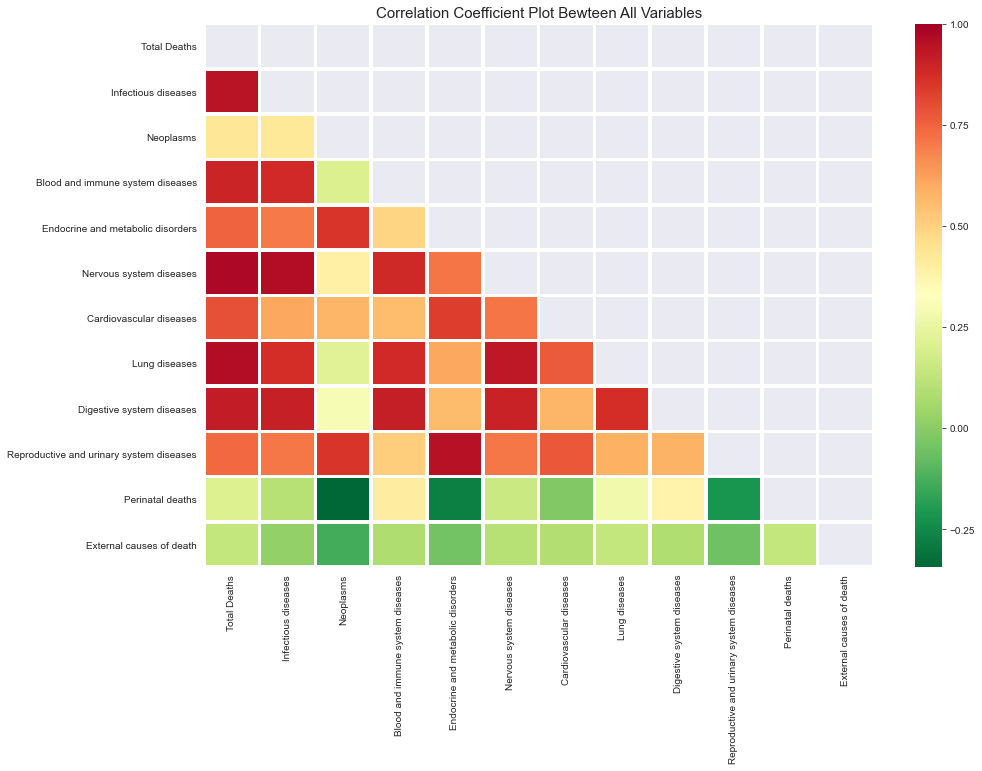

Correlation coefficients between total deaths and each other cause of death:


Total Deaths                                1.000000
Infectious diseases                         0.945527
Neoplasms                                   0.428851
Blood and immune system diseases            0.897277
Endocrine and metabolic disorders           0.749591
Nervous system diseases                     0.973927
Cardiovascular diseases                     0.793359
Lung diseases                               0.959140
Digestive system diseases                   0.917033
Reproductive and urinary system diseases    0.739196
Perinatal deaths                            0.209125
External causes of death                    0.138932
Name: Total Deaths, dtype: float64

In [13]:
# correlation matrix of dataset
fig, ax = plt.subplots(figsize=(15,10))
corrMat=totalDeaths.corr(method='pearson') #use pearson matrix to find the correlation matrix of the dataset

mat=np.zeros_like(corrMat) #matrix of 0's same size as corrMat size
mat[np.triu_indices_from(mat)]=True # removes the top triangle of the data as the matrx is symmetric and therefore repeats itself

sns.heatmap(corrMat,cmap='RdYlGn_r',mask=mat,linewidths=2.5,ax=ax) #plot the correlation matrix in a heatmap
plt.title('Correlation Coefficient Plot Bewteen All Variables',fontsize=15) #set title
plt.show()

print("Correlation coefficients between total deaths and each other cause of death:")
display(corrMat["Total Deaths"])#Print first column

The correlation coefficients between total deaths and causes of death are found between each other and graphed, darker red showing a high correlation coefficient and darker green showing a low correlation coefficient. The upper right triangle is ignored for the graphing as the correlation matrix is symmetric so ignoring it gives a clearer representation. Here we extracted the total deaths correlation coefficients and displayed them under the graph as they are more meaningful to us as total deaths is the response variable. We can, therefore, see which causes of death have the strongest relationship to total deaths. The three causes of deaths that have the strongest correlation coefficients with total deaths are plotted below to give a visual representation of the correlation strength. The colour for the cause of death line is the same as the graphs above to keep it consistent.

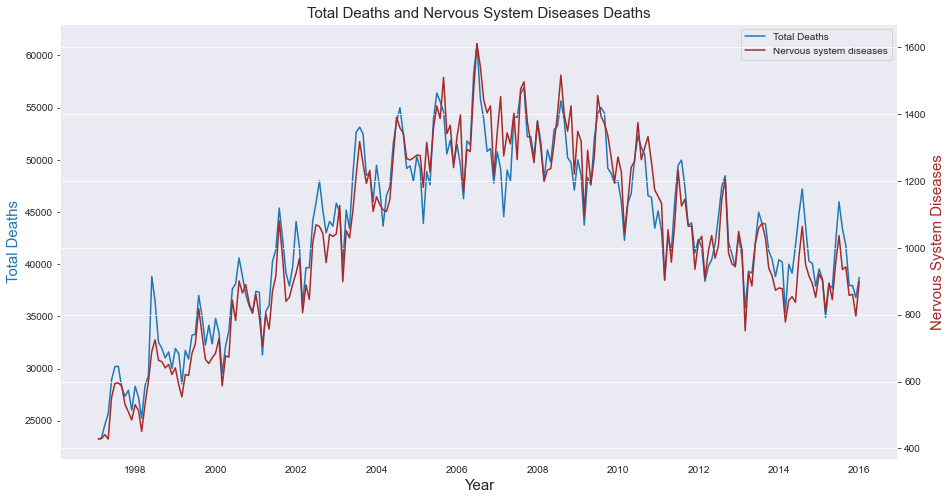

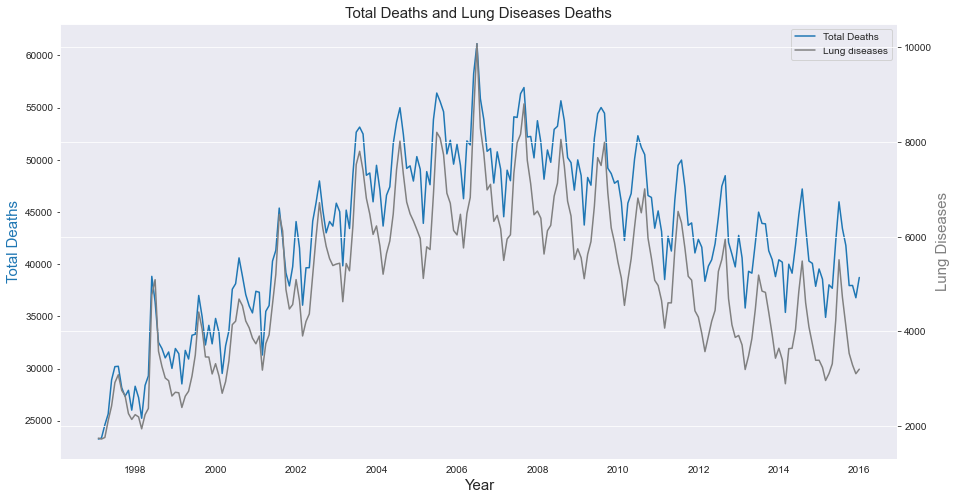

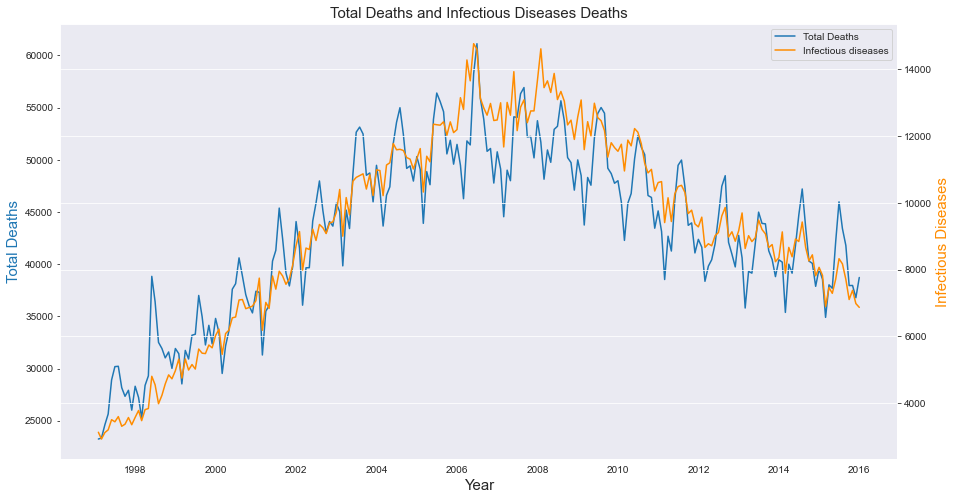

In [14]:
#create the graphs
def graph(colour,name,title):
    fig, ax1 = plt.subplots(figsize=(15,8)) #create figure
    ax2 = ax1.twinx() #2 axis, left(ax1) and right(ax2)

    one=ax1.plot(totalDeaths['Total Deaths'], '#1f77b4',label='Total Deaths') #data for left axis and colour
    ax1.grid(False)
    two=ax2.plot(totalDeaths[name], colour,label=name) #data for right axis and colour
    ax1.set_title(title,fontsize=15) #graph title and font size
    ax1.set_xlabel('Year',fontsize=15) #x axis title and font size
    ax1.set_ylabel('Total Deaths', color='#1f77b4',fontsize=15) #left y axis title and font size
    ax2.set_ylabel(name.title(), color=colour,fontsize=15) #right y axis title and font size
    
    bothLab = one+two
    labs = [l.get_label() for l in bothLab] #get label names
    ax1.legend(bothLab, labs, loc=0) #show legend in top right
    plt.show()

graph('brown','Nervous system diseases','Total Deaths and Nervous System Diseases Deaths') #plot for Total Deaths and Nervous System Diseases Deaths 
graph('gray','Lung diseases','Total Deaths and Lung Diseases Deaths') #plot for Total Deaths and Lung Diseases Deaths
graph('darkorange','Infectious diseases','Total Deaths and Infectious Diseases Deaths') #plot for Total Deaths and Infectious Diseases Deaths

### Explanation of results obtained above

##### Total Deaths and Infectious Diseases Deaths:
The very strong positive correlation coefficient between total deaths and infectious diseases deaths along with the relatively high percentage of deaths contributed by infectious diseases shows that it could be a very strong factor in the total number of deaths per year.

##### Total Deaths and Neoplasms Deaths
The weak positive correlation coefficient between total deaths and neoplasms deaths along with the relatively low percentage of deaths contributed by neoplasms shows that it might not be a strong factor in the total number of deaths per year.

##### Total Deaths and Blood and Immune System Diseases Deaths
The strong positive correlation coefficient between total deaths and blood and immune system deaths shows that it might be a strong factor in the total number of deaths per year however the low percentage of deaths contributed by blood and immune system may mean it is less meaningful.

##### Total Deaths and Endocrine and Metabolic Disorder Deaths
The fairly strong positive correlation coefficient between total deaths and endocrine and metabolic disorder deaths shows that it might be a strong factor in the total number of deaths per year however the low percentage of deaths contributed by the endocrine and metabolic disorder may mean it is less meaningful.

##### Total Deaths and Nervous System Diseases Deaths
The very strong positive correlation coefficient between total deaths and nervous system diseases shows that it might be a strong factor in the total number of deaths per year however the low percentage of deaths contributed by nervous system diseases may mean it is less meaningful. This relationship has the strongest correlation coefficient.

##### Total Deaths and Cardiovascular Diseases Deaths
The strong positive correlation coefficient between total deaths and cardiovascular diseases deaths along with the relatively high percentage of deaths contributed by cardiovascular diseases shows that it might be a strong factor in the total number of deaths per year.

##### Total Deaths and Lung Diseases Deaths
The very strong positive correlation coefficient between total deaths and lung diseases deaths shows that it might be a strong factor in the total number of deaths per year however a lower percentage of deaths contributed by lung diseases may mean it is less meaningful.

##### Total Deaths and Perinatal Deaths
The very weak positive correlation coefficient between total deaths and perinatal deaths along with the relatively low percentage of deaths contributed by perinatal deaths shows that it might not be a strong factor in the total number of deaths per year.

##### Total Deaths and  Digestive System Diseases Deaths
The very strong positive correlation coefficient between total deaths and digestive system diseases deaths shows that it might be a strong factor in the total number of deaths per year however the low percentage of deaths contributed by digestive system diseases may mean it is less meaningful.

##### Total Deaths and  Reproductive and Urinary System Diseases Deaths
The fairly strong positive correlation coefficient between total deaths and reproductive and urinary system deaths shows that it might be a strong factor in the total number of deaths per year however the low percentage of deaths contributed by  reproductive and urinary system diseases may mean it is less meaningful.

##### Total Deaths and External Causes of Deaths
The very weak positive correlation coefficient between total deaths and external causes of death shows that it might not be a strong factor in the total number of deaths per year however a high percentage contribution to total deaths may mean that it does influence total deaths significantly.

### Summary

Infectious diseases, blood and immune system diseases, endocrine and metabolic disorder deaths, nervous system diseases, cardiovascular diseases deaths, lung diseases deaths, digestive system diseases and reproductive and urinary system diseases have strong or very strong correlations to total deaths. Neoplasms deaths, perinatal deaths and external causes of death have weak correlations to total deaths with external causes of death having almost no correlation (0.1 correlation coefficient). The [combined graph](#another_cell), showing total deaths and causes of death, shows how certain causes of death have stayed somewhat consistent from 1997 to the end of 2015 when compared to total deaths, whereas others such as infectious diseases, cardiovascular diseases and lung diseases seem to follow a similar pattern of increasing and decreasing in the same years as total deaths. We expect that infectious diseases, lung diseases and nervous system diseases might have the strongest relationship to total deaths as they have the highest correlation coefficients however nervous system diseases contribute a [low percentage](#perc) to total deaths.

# 4. Model Fitting and Hypothesis Testing

To explore the relationship between total deaths and the causes of death in South Africa, a model needs to be implemented. The data is, therefore, split into training and testing data. The split of training/testing data is 70/30. The training data is used to create a regression model. The model is selected using stepwise regression to select the main causes of death. Stepwise regression works by taking the explanatory variables and giving them a score based on their adjusted R-squared value to the response variable. The highest score is then found and the corresponding cause of death is added to the model. These scores are continuously found based on the adjusted R-squared value from the causes of death that have already been added to the model until the next best variable that will be added to the model leads to a decrease in the model's overall adjusted R-squared value (forward selection method). This is the model selection step. Once this has been done, the test data is used to test the model and obtain the results that need to be interpreted. We can answer the research questions by looking at the regression model's coefficients for each cause of death as well seeing which cause of deaths were removed by the forward selection method.

In [15]:
def forwardSelect(df, respVar):
    
    df.columns = df.columns.str.title() #makes each new word a captial
    df.columns = df.columns.str.replace(' ', '') #remove all spaces in column names so that the formula doesn't read an empty space bewtween words
    remVars = set(df.columns) #get the column names as a set 
    remVars.remove(respVar) #remove the response varibale from this set, there are the remaining variables

    forSel = [] #create an empty list for the forward selected variables
    currScore = 0.0 #sets the current score to be 0.0, a float value, used to determine if the variable is added to the selected variables or not
    highScore = 0.0 #sets the highest score to be 0.0, a float value, used to determine if the variable is added to the selected variables or not
    
    while remVars and currScore == highScore:
        varAndScore = [] #creates the empty list for the variables and their score to be stored
        
        for var in remVars: #loop through all remaining variables
            formula = "{} ~ {} + 1".format(respVar,' + '.join(forSel + [var])) #create the formula in the format TotalDeath ~ selected variable + selected variable + ...
            score = smf.ols(formula, df).fit().rsquared_adj #calculate the scores for the variables from the in dataframe, totalDeaths using the formula mentioned above
            varAndScore.append((score, var)) #add the score and it's corresponding variable name to the list

        varAndScore.sort() #sort the list according to the score values in ascending order
        highScore, varChoice = varAndScore.pop() #the variable with the highest score is removed as it is selected so will no longer need to be considered 

        if currScore < highScore:
            remVars.remove(varChoice) #remove the selected variable as it will no longer need to be considered as it has already been selected
            forSel.append(varChoice) #add the selected variable to the list of selected variables
            currScore = highScore #sec the current score to the highest score to continue the while loop to look for the next best variable to be selected
    formula = "{} ~ {}".format(respVar,' + '.join(forSel)) #create the final formula in the format TotalDeath ~ selected variable + selected variable + ...
    model = smf.ols(formula, df).fit() #create the model from this final formula of selected varibales
    return model #return the model

In [16]:
inputData=totalDeaths.copy() #copy the totalDeaths dataframe to an input dataframe so that totalDeaths is not altered
trainDf, testDf = train_test_split(inputData, test_size=0.3, random_state=100) #splits the data into training and testing data, random_state controls the shuffling applied to the data before applying the split
print("Training data size:",trainDf.shape[0],"observations and",trainDf.shape[1],"variables including the response variable.\n") #shows the training data size

model = forwardSelect(trainDf, 'TotalDeaths') #run the forwardSelect method on the training data

form=model.model.formula
print("Formula:\n", form) #print the model's formula
print("\nAdjusted r squared value:",model.rsquared_adj) #print the model's adjusted r squared value
display(model.summary()) #display the model's summary showing coef, standard error

Training data size: 159 observations and 12 variables including the response variable.

Formula:
 TotalDeaths ~ NervousSystemDiseases + LungDiseases + Neoplasms + InfectiousDiseases + ExternalCausesOfDeath + PerinatalDeaths + CardiovascularDiseases + DigestiveSystemDiseases + EndocrineAndMetabolicDisorders + BloodAndImmuneSystemDiseases

Adjusted r squared value: 0.9991071922951684


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalDeaths   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.768e+04
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          2.56e-222
Time:                        18:00:10   Log-Likelihood:                -1092.2
No. Observations:                 159   AIC:                             2206.
Df Residuals:                     148   BIC:                             2240.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1118.2377    405.521      2.758      0.007     316.878    1919.597
NervousSystemDiseases              1.3912      0.365      3.811      0.000       0.670       2.113
LungDiseases                       1.4492      0.067     21.666      0.000       1.317       1.581
Neoplasms                          0.9783      0.199      4.915      0.000       0.585       1.372
InfectiousDiseases                 1.0686      0.035     30.379      0.000       0.999       1.138
ExternalCausesOfDeath              1.1238      0.046     24.357      0.000       1.033       1.215
PerinatalDeaths                    0.7958      0.042     18.887      0.000       0.713       0.879
CardiovascularDiseases             1.1802      0.075     15.785      0.000       1.032       1.328
DigestiveSystemDiseases            1.6421      0.349      4.701      0.000       0.952       2.332
EndocrineAndMetabolicDisorders     1.3578      0.218      6.231      0.000       0.927       1.788
BloodAndImmuneSystemDiseases       0.8134      0.168      4.830      0.000       0.481       1.146
==============================================================================
Omnibus:                       15.228   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.474
Skew:                           0.667   Prob(JB):                     0.000161
Kurtosis:                       3.926   Cond. No.                     3.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the forward selection method, we obtain a formula with the selected explanatory variables (causes of death). <br>
They are:<br> 
Nervous system diseases <br>  Lung diseases <br>  Neoplasms <br>  Infectious diseases <br>  External causes of death <br>  Perinatal deaths <br>  Cardiovascular diseases <br>  Digestive system diseases <br>  Endocrine and metabolic disorders <br>  Blood and immune system diseases. <br> <br> The cause of death that was not included in the model after the forward selection method was performed on the explanatory variables is "reproductive and urinary system diseases". We can now use this formula obtained from the model above to test the hypothesis. 
<br> <br>
We test using the test data which contains 30% of the observations from total data. This results in the size of the testing data being 69 random observations. Once the model is tested using the test data, we can obtain the regression formula and see how effective this formula is from the model's summary. We can use this to help answer the research questions.

<a id='test'></a>
##### Test Model

In [17]:
print("Testing data size:",testDf.shape[0],"observations and",testDf.shape[1],"variables including the response variable.\n") #shows the testing data size

testDf.columns = testDf.columns.str.title() #makes each new word a captial
testDf.columns = testDf.columns.str.replace(' ', '') #remove all spaces in column names to match the names in the formula
t=testDf.copy()
model2= smf.ols(form, testDf).fit() #fit the test data to the formula
model2.summary() #display the test model's summary showing coef, standard error

Testing data size: 69 observations and 12 variables including the response variable.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalDeaths   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4901.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           5.19e-81
Time:                        18:00:10   Log-Likelihood:                -483.13
No. Observations:                  69   AIC:                             988.3
Df Residuals:                      58   BIC:                             1013.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2389.1973    654.333      3.651      0.001    1079.409    3698.986
NervousSystemDiseases              1.5314      0.778      1.968      0.054      -0.026       3.089
LungDiseases                       1.3529      0.141      9.626      0.000       1.072       1.634
Neoplasms                          0.3061      0.378      0.810      0.421      -0.450       1.063
InfectiousDiseases                 1.1313      0.077     14.743      0.000       0.978       1.285
ExternalCausesOfDeath              0.9821      0.086     11.357      0.000       0.809       1.155
PerinatalDeaths                    0.7647      0.088      8.703      0.000       0.589       0.941
CardiovascularDiseases             1.2595      0.136      9.239      0.000       0.987       1.532
DigestiveSystemDiseases            2.5097      0.662      3.792      0.000       1.185       3.835
EndocrineAndMetabolicDisorders     1.6252      0.400      4.066      0.000       0.825       2.425
BloodAndImmuneSystemDiseases       0.1135      0.370      0.307      0.760      -0.628       0.855
==============================================================================
Omnibus:                       13.223   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.694
Skew:                           0.641   Prob(JB):                     1.18e-05
Kurtosis:                       5.500   Cond. No.                     2.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
error=0
#find the MSE for the test data
for i in range(totalDeaths.shape[0]):
    actual=totalDeaths.iloc[i]['Total Deaths'] #acutal total number of deaths
    predicted=2389.1973+1.5314*totalDeaths.iloc[i]['Nervous system diseases']+1.3529*totalDeaths.iloc[i]['Lung diseases']+0.3061*totalDeaths.iloc[i]['Neoplasms']+1.1313*totalDeaths.iloc[i]['Infectious diseases']+0.9821*totalDeaths.iloc[i]['External causes of death']+0.7647*totalDeaths.iloc[i]['Perinatal deaths']+1.2595*totalDeaths.iloc[i]['Cardiovascular diseases']+2.5097*totalDeaths.iloc[i]['Digestive system diseases']+1.6252*totalDeaths.iloc[i]['Endocrine and metabolic disorders']+0.1135*totalDeaths.iloc[i]['Blood and immune system diseases'] 
    error=error+np.power((actual-predicted),2) #total error
print("Mean Squared Error on test data",np.round(error/totalDeaths.shape[0],2)) #printt the MSE

Mean Squared Error on test data 81454.37


From this, we can see that the standard error from the above table is relatively low and the R-squared and adjusted R-squared values are very high as the range for R-squared is between 0 and 1. This means that the regression model using stepwise regression fits the observations very well. Using the test data, it shows from the results above that the regression equation could be:
<br>
<br>
$Total Deaths = 2389.1973 + 1.5314x_{1}+ 1.3529x_{2}+ 0.3061x_{3}+ 1.1313x_{4}+ 0.9821x_{5}+ 0.7647x_{6}+ 1.2595x_{7}+ 2.5097x_{8}+ 1.6252x_{9}+ 0.1135x_{10}$
<br>
<br>
Where:
<br>
$x_{1}$ = NervousSystemDiseases<br>
$x_{2}$ = LungDiseases<br>
$x_{3}$ = Neoplasms<br>
$x_{4}$ = InfectiousDiseases<br>
$x_{5}$ = ExternalCausesOfDeath<br>
$x_{6}$ = PerinatalDeaths<br>
$x_{7}$ = CardiovascularDiseases<br>
$x_{8}$ = DigestiveSystemDiseases<br>
$x_{9}$ = EndocrineAndMetabolicDisorders<br>
$x_{10}$ = BloodAndImmuneSystemDiseases<br>

### Partial Regression Plots

The partial regression plots are shown below for each of the variables in the model that was tested on the test data which contains 30% of the data. The intercept is also graphed.

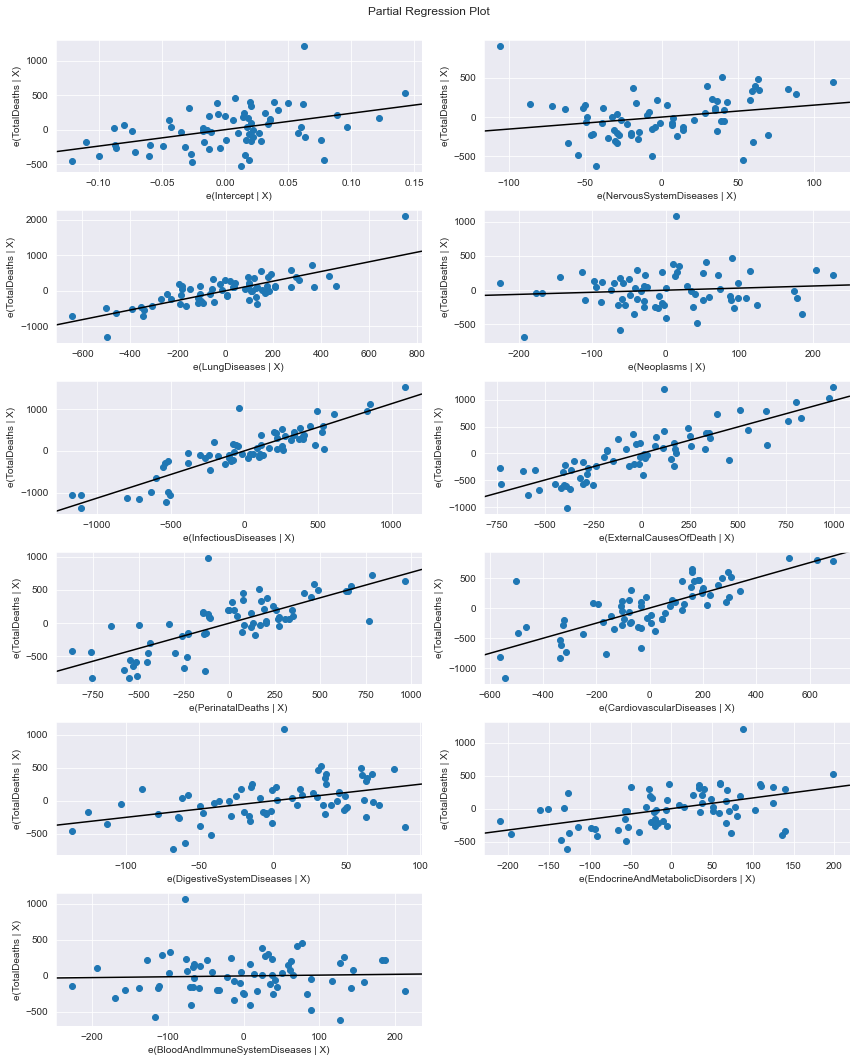

In [19]:
fig = plt.figure(figsize=(12,15))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig) #partial regression plot for the model

From the testing of the model [here](#test), we can see which of the causes of death have a stronger relationship to total deaths, namely digestive system diseases, endocrine and metabolic disorders and nervous system diseases. We can also see which causes of death have a weak relationship, namely blood and immune system diseases and neoplasms. The relationships are based on the cause of death's correlation to total deaths as well as how many deaths it contributes to total deaths. Expectations were not all met. The highest contributing cause of death is infectious and parasitic diseases which were expected as stated earlier in the introduction (in 2015 one the top three leading causes of death in South Africa was tuberculosis which belongs to this category). External causes of death were expected to not have a strong correlation to total deaths but we found that, after data analysis, it remained a factor in the model and was not excluded as expected. Reproductive and urinary system diseases were expected to not have a strong correlation as it contributes a very small percentage of total deaths and this was validated in the model through it being excluded. Taking into account that the quality of the data is high (as it has been validated), contains no missing variables and has no potential bias, the results are meaningful. The results are limited based on the years that the data contains and within the past 4 years there could have been a spike in certain causes of death causing a change in the data and, therefore, the overall results.

# 5. Conclusion

The research questions were stated in the introduction. They are: <br>
Which causes of death have a major relationship to South Africa's total numbers of deaths? <br>Which cause of death has the highest percentage contribution to total deaths? <br>Which causes of death have no relationship to total deaths?<br> Which causes of death should be targeted to achieve a lower total number of deaths per year?<br><br> Through testing and exploring the data, these questions can now all be answered. Infectious and parasitic diseases have the highest percentage contribution to total deaths. Digestive system diseases, endocrine and metabolic disorders and nervous system diseases are the top three causes of death that have the strongest correlation to total deaths as shown in our model. These three causes of death along with infectious and parasitic disease (due to the high percentage of deaths it contributes and it is one of the stronger relationships to total deaths) should be targeted to achieve a lower total number of deaths per year. Reproductive and urinary system diseases have no relationship to total deaths due to the very small percentage of deaths it contributes and this was validated in the model through it being excluded.
<br><br>
Next steps could be to extend the data to include more recent years and also to obtain exact causes of death such as tuberculosis, diabetes and strokes so that we have more specific causes of deaths rather than general categories of deaths. This will help identify which exact cause of death has the strongest correlation to total deaths in South Africa which can then be specifically targeted to achieve a lower total number of deaths per year.